# In this notebook we clean the data and store in a .csv file

In [1]:
import pandas as pd
import numpy as np
import nltk
import re # regex lib for cleaning
from nltk.corpus import stopwords # list of stopwords
from nltk.stem import WordNetLemmatizer # for lemmatizing (years to year)

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

In [2]:
df =  pd.read_csv('comments_trustpilot_en.csv')
df.head()

,comment,rating,url_website,company_name,company_website,company_logo
0,Excellent ...,5,https://www.trustpilot.com/review/rentokil.com,Rentokil,http://rentokil.com?utm_medium=company_profile...,//s3-eu-west-1.amazonaws.com/tpd/screenshots/5...
1,The dog become healthy. Thank you.,5,https://www.trustpilot.com/review/www.topdogra...,Topdograwfoods,http://www.topdograwfoods.com?utm_medium=compa...,//s3-eu-west-1.amazonaws.com/tpd/screenshots/5...
2,"Quality service, everyone is happy.",5,https://www.trustpilot.com/review/www.topdogra...,Topdograwfoods,http://www.topdograwfoods.com?utm_medium=compa...,//s3-eu-west-1.amazonaws.com/tpd/screenshots/5...
3,Went to Top Dog raw food this morning for the ...,5,https://www.trustpilot.com/review/www.topdogra...,Topdograwfoods,http://www.topdograwfoods.com?utm_medium=compa...,//s3-eu-west-1.amazonaws.com/tpd/screenshots/5...
4,"Very stylish site, has enough information to m...",5,https://www.trustpilot.com/review/www.topdogra...,Topdograwfoods,http://www.topdograwfoods.com?utm_medium=compa...,//s3-eu-west-1.amazonaws.com/tpd/screenshots/5...


# The above DataFrame contains extra information which is not needed to train/test the model. For the purpose of training/testing we will be using 1st, & 2nd columns. 

In [3]:
df = df.iloc[:,:2]
df.head()

,comment,rating
0,Excellent ...,5
1,The dog become healthy. Thank you.,5
2,"Quality service, everyone is happy.",5
3,Went to Top Dog raw food this morning for the ...,5
4,"Very stylish site, has enough information to m...",5


In [4]:
df.shape

(1194983, 2)

In [5]:
df.isnull().sum()

comment    0
rating     0
dtype: int64

In [6]:
print('1st review:',df.iloc[0,0])
print('2nd review:',df.iloc[1,0])
print('3nd review:',df.iloc[43,0])

1st review: Excellent ...
2nd review: The dog become healthy. Thank you.
3nd review: As good as always. The Lobophyllia coral was placed in tank on Thursday and  has had two feeds so far and has puffed up nice. Lovely coral. Thanks again for top corals and service. Colin Forsdick.


# To remove the stopwords such as 'is, the, to' stop_words is a set containing all the stopwords in it.

In [7]:
stop_words = {'a','about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't",
             'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn',
             "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during',
             'each', 'few', 'for', 'from', 'further', 'go', 'g', 'goes', 'get', 'got', 'gave', 'getting', 'gets','gives', 'given', 
              'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have','haven',"haven't",'having','he','her','here','hers','herself',
              'him','himself','his', 'hmm', 'how','i','if','in','into','is','isn',"isn't",'it',"it's",'its','itself','just','ll','m','ma',
              'me','mightn',"mightn't",'more','most','mustn',"mustn't",'my','myself','needn',"needn't",'now','o','of','off','on',
              'once','only','or','other','our','ours','ourselves','out','over','own','re','s','same','shan',"shan't",'she',"she's",
              'should',"should've",'shouldn',"shouldn't",'so','some','such','t','than','that',"that'll",'the','their','theirs',
              'them','themselves','then','there','these','they','this','those','through','to','too','under','until','up','umm', 've',
              'was','wasn',"wasn't",'we','were','weren',"weren't",'what','when','where','which','while','who','whom','why','will',
              'with','won',"won't",'wouldn',"wouldn't",'y','you',"you'd","you'll","you're","you've",'your','yours','yourself',
              'yourselves'}

# The words like ' aren't, isn't ' are converted to 'are not, is not' 

In [8]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

## In the data cleaning part.
### step1 lower the entire sentence, so that 'he' and 'HE' is not treated as a different words.
### step2 contraction_mapping replace words 'aren't to are not' etc.
### step3 remove special characters such as ' * ( ] " ' and keep characters a-z in the reviews.
### step4 LEMMATIZATION convert the words to it's root form. (historical --> history)

In [9]:
lemma = WordNetLemmatizer()
def clean_review(review):
    
    review = review.lower()
    review = ' '.join([contraction_mapping[w] if w in contraction_mapping else w for w in review.split(" ")])
    review = re.sub(r'\([^)]*\)', '', review)
    review = re.sub('"','', review)
    review = re.sub(r"'s\b","",review)
    review = re.sub("[^a-zA-Z]", " ", review)
    review = re.sub('[m]{2,}', 'mm', review)
    review = ' '.join([lemma.lemmatize(stop) for stop in review.split(' ') if stop not in stop_words and len(stop)>1])
    return review

In [10]:
cleaned_reviews = []
for i in df.iloc[:,0]:
    cleaned_reviews.append(clean_review(i))

In [11]:
df['cleaned_reviews'] = cleaned_reviews
df = df[['cleaned_reviews','rating']]
df.head()

,cleaned_reviews,rating
0,excellent,5
1,dog become healthy thank,5
2,quality service everyone happy,5
3,went top dog raw food morning first time amazi...,5
4,very stylish site enough information make choi...,5


## The length of each review is counted and stored in count.
## empty countains the index of reviews having length=0 after cleaning the reviews.
## The empty reviews are dropped from the DataFrame.

In [12]:
count = []
for val in df['cleaned_reviews']:
    count.append(len(val.split()))
len(count)

1194983

In [13]:
empty = []
for ind, i in enumerate(cleaned_reviews):
    if len(cleaned_reviews[ind].split())==0:
        empty.append(ind)

## Histogram for the length of the reviews. Based on the max frequency of reviews the length of the reviews will be considered.

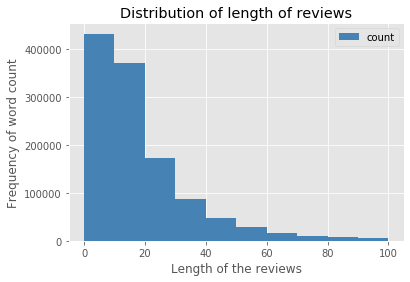

In [14]:
sent_len = pd.DataFrame({'count':count})
sent_len.plot(kind='hist', figsize=(6, 4), color='steelblue',bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of length of reviews')
plt.ylabel('Frequency of word count')
plt.xlabel('Length of the reviews')

plt.show()

## Distribution of the target variable containing 5 categories.

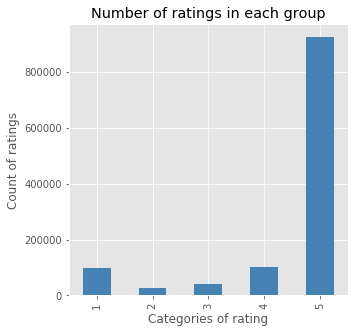

In [15]:
ratings = pd.value_counts(df['rating'], sort=False)
ratings.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

## 82% of reviews have length upto 30 words.

In [16]:
cnt, edg = np.histogram(sent_len,bins = [0,10,20,30,40,50,60,70,80,90,100])
(cnt[0] + cnt[1] + cnt[2])/sum(cnt)

0.8275507426886355

In [17]:
df.drop(df.index[empty], inplace = True)
df.shape

(1194697, 2)

## For the first model we will consider first 10 words of each reviews.

In [18]:
# max len of reviews to 10
review_len10 = []
for rev in df['cleaned_reviews']:
    rev = rev.split()
    review_len10.append(' '.join(rev[0:10]))
print(review_len10[4])
df['review_length_10']= review_len10

very stylish site enough information make choice buy pet happy


In [19]:
df.head()

,cleaned_reviews,rating,review_length_10
0,excellent,5,excellent
1,dog become healthy thank,5,dog become healthy thank
2,quality service everyone happy,5,quality service everyone happy
3,went top dog raw food morning first time amazi...,5,went top dog raw food morning first time amazi...
4,very stylish site enough information make choi...,5,very stylish site enough information make choi...


# Saved the cleaned data in a new csv file

In [20]:
df.to_csv('cleaned_reviews.csv',index=False) 